# Visualisierung 
## Allgemein
Hier werden verschiedene Möglichkeiten der Datendarstellung untersucht. Dabei   
werden für die Darstellung als Bibliothek Seaborn und Matplotlib verwendet.

In [1]:
import pandas
import seaborn as sns
import os
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# Lesen der Merkmale
featuresDf = pandas.read_csv("../merkmale.csv")
featuresDf.describe()

,Zeitstempel,Breitengrad,Laengengrad,Geschwindigkeit,Messwerte,StartBewegungsD,StartBelichtung,Belichtungszeit,MittelX,MittelY,...,VarianzX,VarianzY,VarianzZ,VarianzNick,VarianzRoll,AbweichungX,AbweichungY,AbweichungZ,AbweichungNick,AbweichungRoll
count,1.214900e+04,12149.000000,12149.000000,12149.000000,12149.0,1.214900e+04,1.214900e+04,1.214900e+04,12149.000000,12149.000000,...,12149.000000,12149.000000,12149.000000,12149.000000,12149.000000,12149.000000,12149.00000,12149.000000,12149.000000,12149.000000
mean,1.520521e+12,53.621404,10.175575,15.419228,20.0,3.972071e+12,3.972161e+12,1.931440e+07,0.001482,0.003506,...,2.121109,16.710875,17.784782,0.176490,0.252438,1.200596,3.22775,3.402667,0.380466,0.323835
std,1.226303e+06,0.006939,0.018062,3.447197,0.0,1.226303e+12,1.226303e+12,8.842717e+06,0.279567,0.564297,...,4.805029,37.120677,34.064271,0.165855,0.595264,0.824460,2.50859,2.491415,0.178153,0.384162
min,1.520519e+12,53.610477,10.137807,5.004000,20.0,1.618455e+12,1.618559e+12,4.127597e+06,-2.285901,-4.989452,...,0.000370,0.000230,0.000380,0.000000,0.000010,0.019240,0.01517,0.019490,0.000000,0.003160
25%,1.520520e+12,53.614110,10.161995,13.608000,20.0,2.973751e+12,2.973839e+12,1.000184e+07,-0.141578,-0.247978,...,0.515670,3.221720,3.578670,0.059210,0.011630,0.718100,1.79492,1.891740,0.243330,0.107840
50%,1.520521e+12,53.621760,10.177186,15.804000,20.0,3.963729e+12,3.963809e+12,2.000368e+07,0.000789,-0.004989,...,0.937230,6.096390,6.850140,0.114540,0.025740,0.968110,2.46909,2.617280,0.338440,0.160440
75%,1.520523e+12,53.627620,10.190325,17.712000,20.0,4.998830e+12,4.998939e+12,2.999632e+07,0.140186,0.253781,...,1.950760,13.289150,15.018690,0.240750,0.099260,1.396700,3.64543,3.875400,0.490660,0.315060
max,1.520523e+12,53.635113,10.203202,24.984000,20.0,5.977850e+12,5.977940e+12,2.999632e+07,2.644231,5.218423,...,144.743590,502.054320,575.782600,1.071350,5.731200,12.030940,22.40657,23.995470,1.035060,2.393990


In [3]:
# Gibt die Spaltennamen aus
featuresDf.columns

Index(['Zeitstempel', 'Breitengrad', 'Laengengrad', 'Geschwindigkeit',
       'AccelerometerX', 'AccelerometerY', 'AccelerometerZ', 'Azimuth', 'Nick',
       'Roll', 'SensorZeitstempel', 'Messwerte', 'StartBewegungsD',
       'StartBelichtung', 'Belichtungszeit', 'MittelX', 'MittelY', 'MittelZ',
       'MittelNick', 'MittelRoll', 'AzimuthAenderung', 'VarianzX', 'VarianzY',
       'VarianzZ', 'VarianzNick', 'VarianzRoll', 'AbweichungX', 'AbweichungY',
       'AbweichungZ', 'AbweichungNick', 'AbweichungRoll'],
      dtype='object')

Mit der Seaborn Funktion pairplot können Variablen gegenübergestellt werden. Dieses ist interessant,um einen      
ersten Überblick zu bekommen. In jeder Reihe des Gitter-Plots wird eine Variable geplottet und mit    
den anderen Variablen in dem Spalten des Rasters gegenübergestellt.    
Dabei werden die Diagonalen Achsen als Blockdiagramm dargestellt, welche das Verteilungsverhältnis der    
einzelnen Variablen zeigt.  

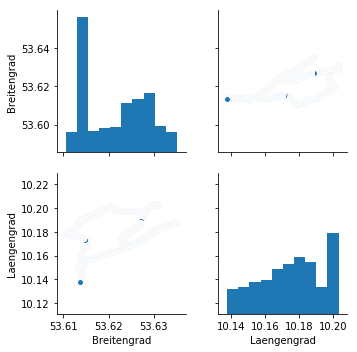

In [4]:
# Gegenüberstellung von Breiten und Längengrad
sns.pairplot(featuresDf[['Breitengrad','Laengengrad']])

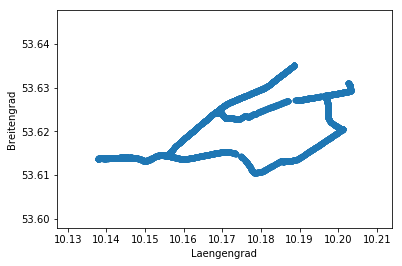

In [46]:
featuresDf[['Breitengrad','Laengengrad']].plot(kind="scatter", x="Laengengrad", y="Breitengrad")

Text(0.5,1,'GPS Koordinaten')

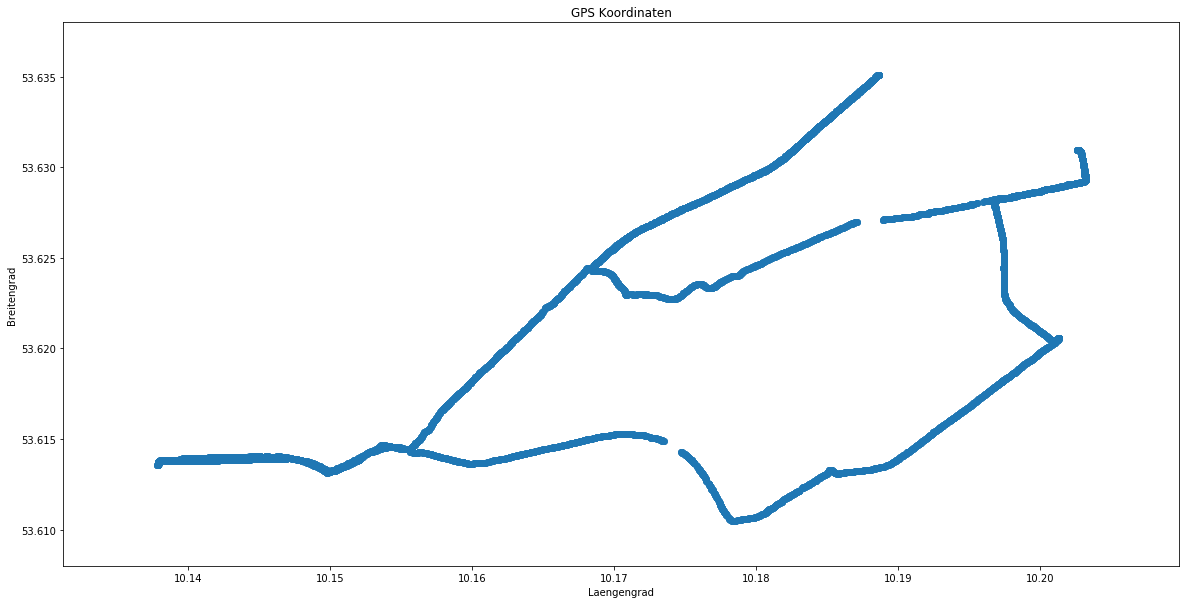

In [57]:
plt.figure(figsize=(20,10))
sns.regplot(x=featuresDf["Laengengrad"], y=featuresDf["Breitengrad"],fit_reg=False)
plt.ylim(53.608, 53.638) # Begrenzung der Y-Achsen-Darstellung
plt.title('GPS Koordinaten')

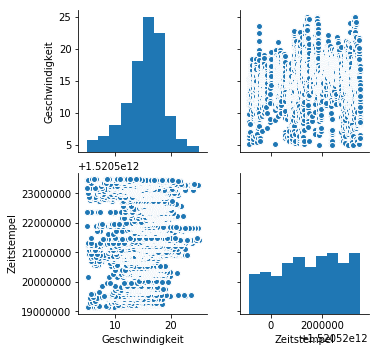

In [10]:
# pairplot mit Geschwindigkeit und Zeitstempel
sns.pairplot(featuresDf[['Geschwindigkeit','Zeitstempel']])

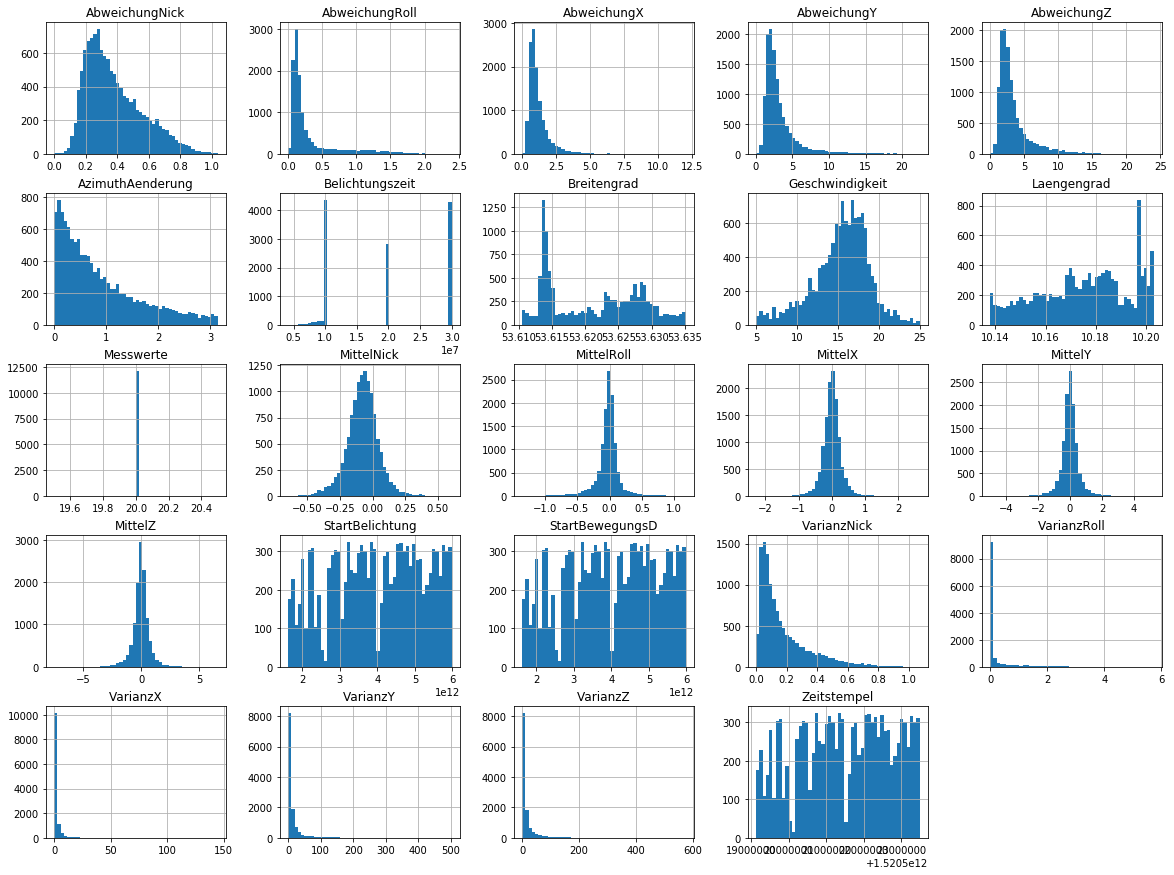

In [11]:
# Als Histogramdiagramm werden alls Merkmale dargestellt. 
# Dadurch ist ein erster Eindruck über den Wertereich der Daten möglich
featuresDf.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
accDf = featuresDf[['AccelerometerX','AccelerometerY','AccelerometerZ','MittelX','MittelY','MittelZ'
                   ,'VarianzX','VarianzY','VarianzZ','AbweichungX','AbweichungY','AbweichungZ']]
accDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12149 entries, 0 to 12148
Data columns (total 12 columns):
AccelerometerX    12149 non-null object
AccelerometerY    12149 non-null object
AccelerometerZ    12149 non-null object
MittelX           12149 non-null float64
MittelY           12149 non-null float64
MittelZ           12149 non-null float64
VarianzX          12149 non-null float64
VarianzY          12149 non-null float64
VarianzZ          12149 non-null float64
AbweichungX       12149 non-null float64
AbweichungY       12149 non-null float64
AbweichungZ       12149 non-null float64
dtypes: float64(9), object(3)
memory usage: 1.1+ MB


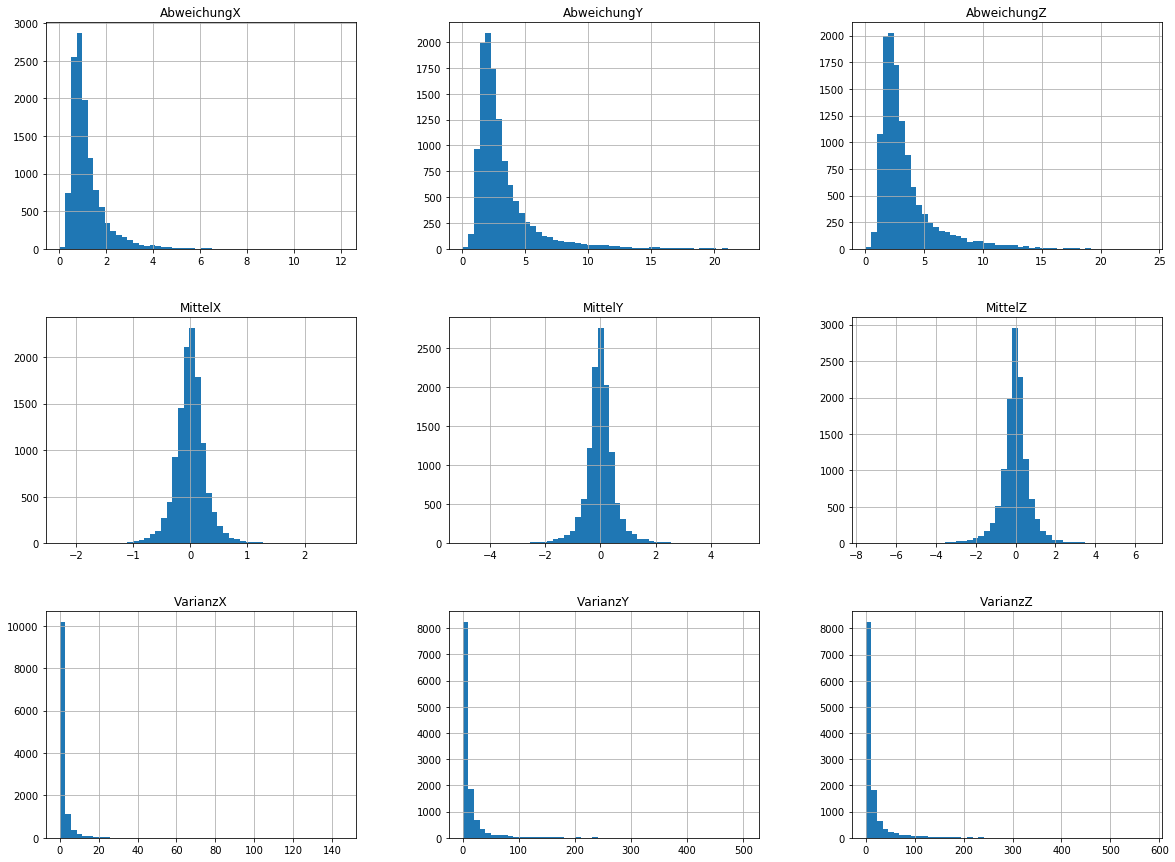

In [13]:
accDf.hist(bins=50, figsize=(20,15))
plt.show()

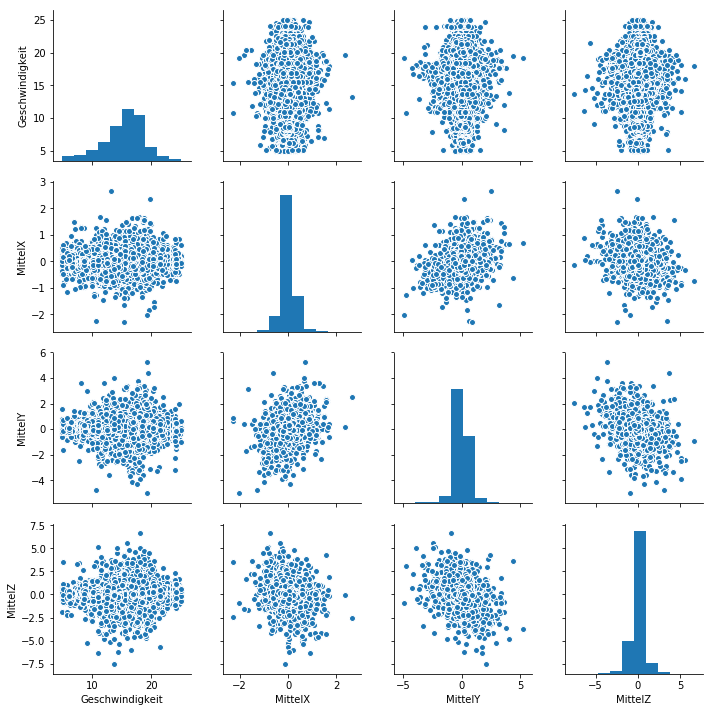

In [14]:
# Die Geschwindigkeit wird den Mittelwert der Beschleunigungssensordaten X,Y,Z gegenübergestellt.
# Hier werden auch die Mittelwerte miteinander geplottet.
sns.pairplot(featuresDf[['Geschwindigkeit','MittelX','MittelY','MittelZ']])

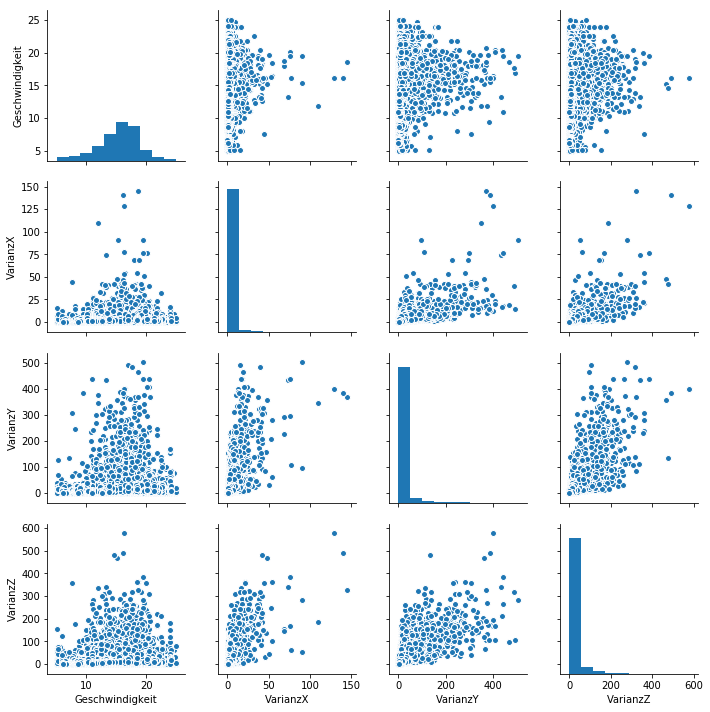

In [15]:
# Varianz der Beschleunigungsensorachsen
sns.pairplot(featuresDf[['Geschwindigkeit','VarianzX','VarianzY','VarianzZ']])

In [49]:
featuresDf['Geschwindigkeit'].min()

0.0

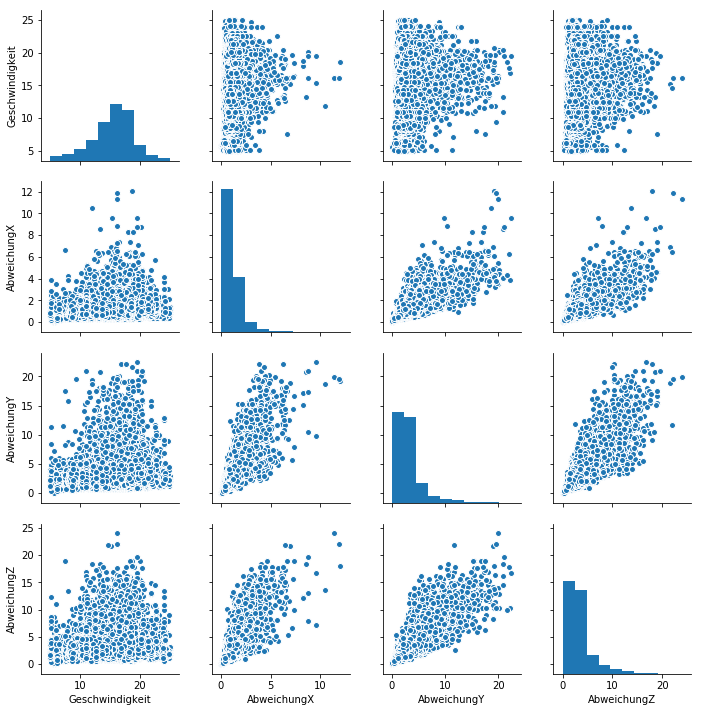

In [16]:
# Standardabweichung der Beschleunigungsensorachsen
sns.pairplot(featuresDf[['Geschwindigkeit','AbweichungX','AbweichungY','AbweichungZ']])

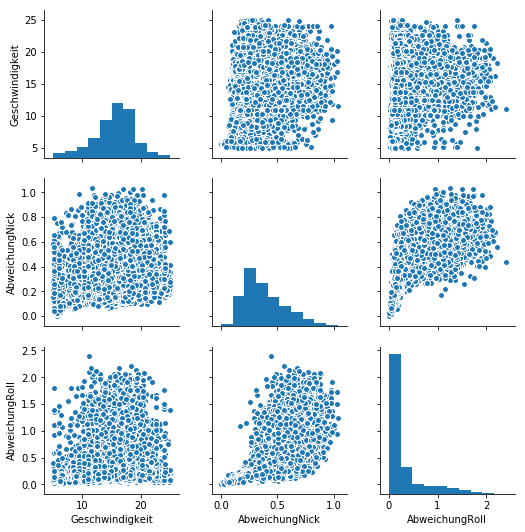

In [21]:
sns.pairplot(featuresDf[['Geschwindigkeit','Azimuth','AbweichungNick','AbweichungRoll']])

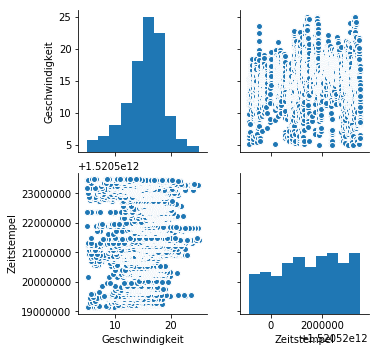

In [19]:
# Azimuth gibt die Winkeländerung in Rad an von Start der Datenerfassung bis zum Stopp dieser. 
sns.pairplot(featuresDf[['Geschwindigkeit','Azimuth','Zeitstempel']])

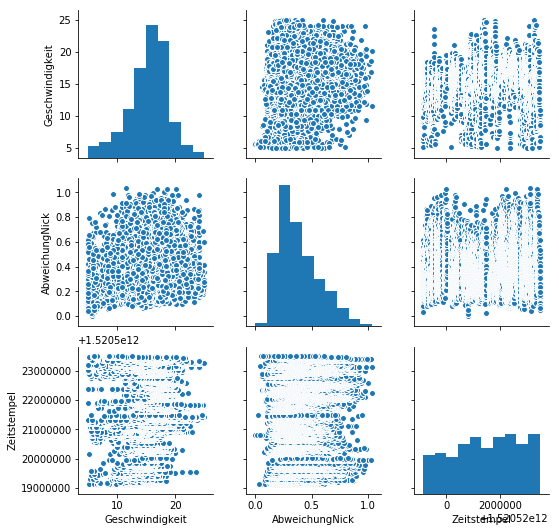

In [22]:
sns.pairplot(featuresDf[['Geschwindigkeit','AbweichungNick','Zeitstempel']])

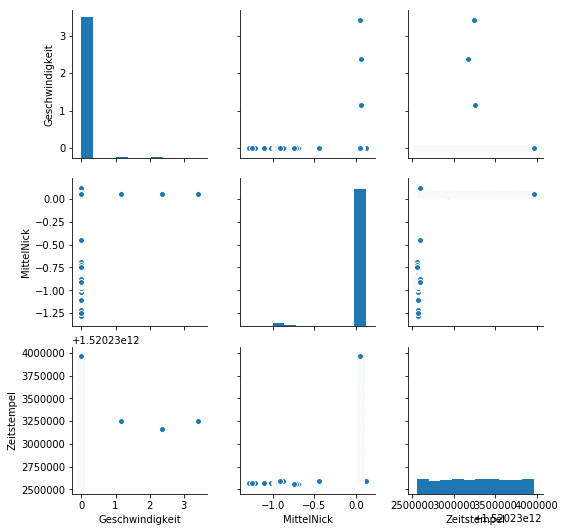

In [55]:
sns.pairplot(featuresDf[['Geschwindigkeit','MittelNick','Zeitstempel']])

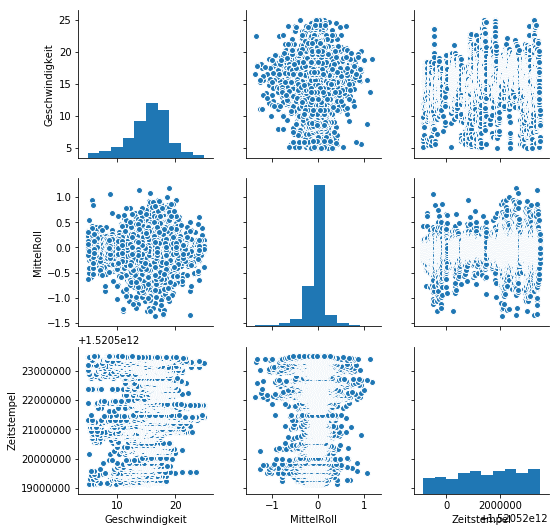

In [23]:
sns.pairplot(featuresDf[['Geschwindigkeit','MittelRoll','Zeitstempel']])

In [70]:
# Zusammenhänge werden berechnet mit der Person Methode
corrMatrix = featuresDf.corr()
corrMatrix['Geschwindigkeit'].sort_values()

Breitengrad        -0.081863
AbweichungZ        -0.013971
AbweichungRoll     -0.011705
AbweichungY        -0.010514
AbweichungX        -0.010431
MittelRoll         -0.009524
AbweichungNick     -0.008352
StartBewegungsD    -0.007872
StartBelichtung    -0.007870
Zeitstempel        -0.007870
AzimuthAenderung   -0.005957
VarianzZ           -0.004790
VarianzY           -0.004252
VarianzRoll        -0.003773
VarianzNick        -0.003323
VarianzX           -0.003176
MittelY            -0.000390
MittelZ             0.000119
MittelX             0.003794
MittelNick          0.009730
Belichtungszeit     0.009761
Laengengrad         0.097829
Geschwindigkeit     1.000000
Messwerte                NaN
Name: Geschwindigkeit, dtype: float64

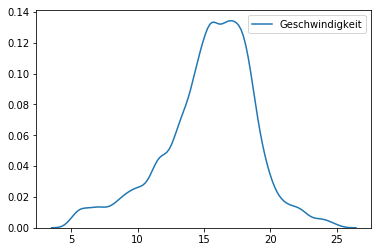

In [24]:
sns.kdeplot(featuresDf['Geschwindigkeit'])

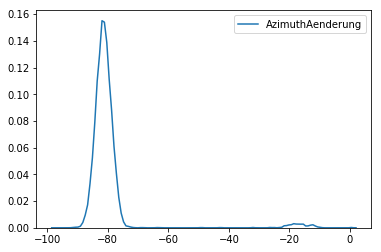

In [60]:
sns.kdeplot(featuresDf['AzimuthAenderung'])

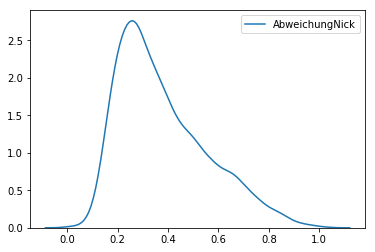

In [25]:
sns.kdeplot(featuresDf['AbweichungNick'])

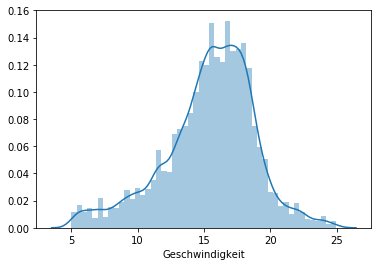

In [26]:
sns.distplot(featuresDf['Geschwindigkeit'])

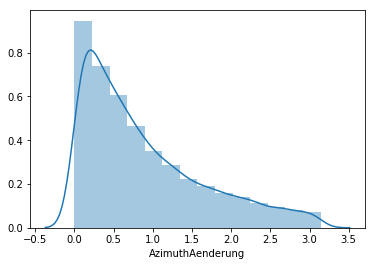

In [27]:
sns.distplot(featuresDf['AzimuthAenderung'],  bins=14)

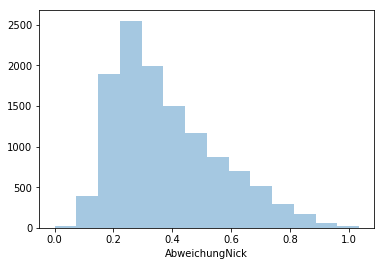

In [29]:
sns.distplot(featuresDf['AbweichungNick'], bins=14, kde=False)